## TEORIA & MODELAGEM



## INSTALL


##IMPORTS

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt
from docplex.mp.model import Model
import docplex.mp.solution as Solution

##FUNÇÕES

In [35]:
def CreateLocation(amount):
    return [i for i in range(amount)]

def CreatePath(location):
    #The creation of paths obey one restriction, they cannot connect a node - or 
    #location - with itself, so we avoid that writing a IF at the end of a list 
    #comprehention
    return [(i,j) for i in location for j in location if i!=j]

In [36]:
def RandCoordinates(ammount):
    random = np.random
    random.seed(1)
    X = np.round(random.rand(n)*1000,1)
    Y = np.round(random.rand(n)*1000,1)
  
    return X,Y

In [37]:
def plotMap(x,y):
    plt.figure(figsize=(12,8))
    plt.scatter(x,y,color='blue')
    s=[]
    for n in range(len(x)):
        s_temp=[]
        s_temp.append("%.1f" %x[n])
        s_temp.append("%.1f" %y[n])
        s.append(s_temp)

    plt.xlabel("X Coordinates")
    plt.ylabel("Y Coordinates")
    plt.title("Locations - TSP")

    for n in range(len(x)):
        plt.annotate(str(s[n]), xy=(x[n],y[n] ), xytext=(x[n]-50,y[n]-30),color='purple')

    for n in range(len(x)):
        plt.annotate(str(n), xy=(x[n],y[n] ), xytext=(x[n]+5,y[n]+10),color='red')

    plt.show()

In [38]:
def pythagoras(x,y,i,j):
    return round(math.sqrt((x[i]-x[j])**2 + (y[i] - y[j])**2),1)
  
  

In [80]:
def plotMapFinal(x,y,x_final,paths):
    plt.figure(figsize=(12,8))
    plt.scatter(x,y,color='blue')
    s=[]
    for n in range(len(x)):
        s_temp=[]
        s_temp.append("%.1f" %x[n])
        s_temp.append("%.1f" %y[n])
        s.append(s_temp)
    
    arcos_activos = [i for i in paths if x_final[i].solution_value > 0.9]
    for i,j in arcos_activos:
        plt.plot([x[i],x[j]],[y[i],y[j]],color='b', alpha=0.4, zorder=0)
        plt.scatter(x=x, y=y, color='blue', zorder=1)
    
    plt.xlabel("X Coordinates")
    plt.ylabel("Y Coordinates")
    plt.title("Locations - TSP")

    for n in range(len(x)):
        plt.annotate(str(s[n]), xy=(x[n],y[n] ), xytext=(x[n]-50,y[n]-30),color='purple')

    for n in range(len(x)):
        plt.annotate(str(n), xy=(x[n],y[n] ), xytext=(x[n]+5,y[n]+10),color='red')

    plt.show()


##MAIN

In [119]:
#Ammount of locations and it's paths
n = 30

#Create Location
location = CreateLocation(n)
#Create Path
paths = CreatePath(location)
#Create Coordinates
x_coordinate, y_coordinate = RandCoordinates(paths)

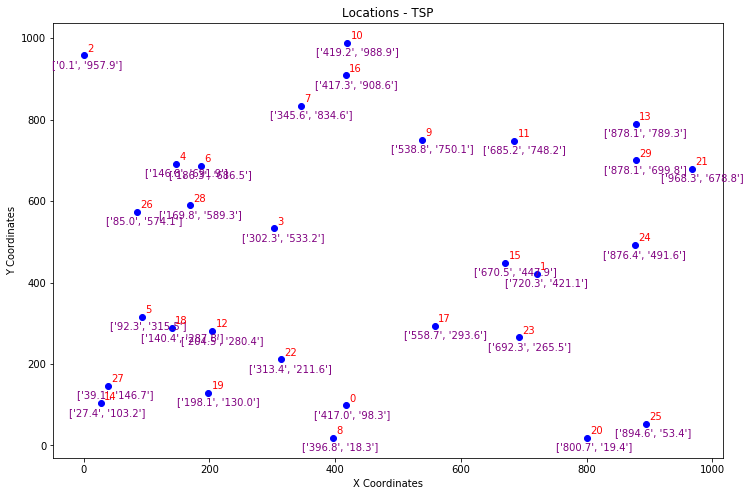

In [120]:
plotMap(x_coordinate, y_coordinate)

In [121]:
distance={}
for i in range(n):
    for j in range(n):
        if i != j:
            distance[i,j] = pythagoras(x_coordinate, y_coordinate,i,j)


##MODELAGEM

In [122]:
#Defining the model problem
model = Model('Traveling Salesman Problem')

In [123]:
x=model.binary_var_dict(paths,name='x')
d=model.continuous_var_dict(location,name='d')

In [124]:
model.minimize(model.sum(distance[i]*x[i] for i in paths))

In [125]:
for c in location:
    model.add_constraint(model.sum(x[(i,j)] for i,j in paths if i==c)==1, 
                       ctname='out_%d'%c)

In [126]:
for c in location:
    model.add_constraint(model.sum(x[(i,j)] for i,j in paths if j==c)==1, 
                       ctname='out_%d'%c)

In [127]:
# Por último restricción lógica
for i,j in paths:
    if j!=0:
        model.add_indicator(x[(i,j)],d[i]+1==d[j], 
                          name='order_(%d,_%d)'%(i, j))

In [128]:
print(model.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Traveling Salesman Problem

Minimize
 obj: 442.900000000000 x_0_1 + 955.400000000000 x_0_2 + 449.800000000000 x_0_3
      + 652.200000000000 x_0_4 + 390.600000000000 x_0_5 + 631.800000000000 x_0_6
      + 739.800000000000 x_0_7 + 82.500000000000 x_0_8 + 663.100000000000 x_0_9
      + 890.600000000000 x_0_10 + 703.100000000000 x_0_11
      + 279.900000000000 x_0_12 + 830.700000000000 x_0_13
      + 389.600000000000 x_0_14 + 431.800000000000 x_0_15
      + 810.300000000000 x_0_16 + 241.300000000000 x_0_17
      + 335.300000000000 x_0_18 + 221.200000000000 x_0_19
      + 391.700000000000 x_0_20 + 800.600000000000 x_0_21
      + 153.500000000000 x_0_22 + 322.100000000000 x_0_23
      + 604.800000000000 x_0_24 + 479.700000000000 x_0_25
      + 580.200000000000 x_0_26 + 381 x_0_27 + 549.700000000000 x_0_28
      + 757.900000000000 x_0_29 + 442.900000000000 x_1_0
      + 898.200000000000 x_1_2 + 432.800000000000 x_

In [129]:
solution = model.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve modified 406 coefficients.
Aggregator did 406 substitutions.
Reduced MIP has 495 rows, 1335 columns, and 3045 nonzeros.
Reduced MIP has 870 binaries, 0 generals, 0 SOSs, and 841 indicators.
Presolve time = 0.01 sec. (3.56 ticks)
Probing time = 0.01 sec. (2.46 ticks)
Tried aggregator 1 time.
Reduced MIP has 495 rows, 1335 columns, and 3045 nonzeros.
Reduced MIP has 870 binaries, 0 generals, 0 SOSs, and 841 indicators.
Presolve time = 0.01 sec. (2.12 ticks)
Probing time = 0.01 sec. (2.46 ticks)
Clique table members: 466.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.00 sec. (1.00 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

      0     0     3675.2000    29                  

In [132]:
model.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [133]:
solution.display()

solution for: Traveling Salesman Problem
objective: 4788.700
x_0_22 = 1
x_1_15 = 1
x_2_10 = 1
x_3_28 = 1
x_4_2 = 1
x_5_18 = 1
x_6_4 = 1
x_7_9 = 1
x_8_0 = 1
x_9_11 = 1
x_10_16 = 1
x_11_13 = 1
x_12_3 = 1
x_13_29 = 1
x_14_27 = 1
x_15_17 = 1
x_16_7 = 1
x_17_23 = 1
x_18_12 = 1
x_19_14 = 1
x_20_8 = 1
x_21_24 = 1
x_22_19 = 1
x_23_25 = 1
x_24_1 = 1
x_25_20 = 1
x_26_6 = 1
x_27_5 = 1
x_28_26 = 1
x_29_21 = 1
d_1 = 23.000
d_2 = 13.000
d_3 = 8.000
d_4 = 12.000
d_5 = 5.000
d_6 = 11.000
d_7 = 16.000
d_8 = 29.000
d_9 = 17.000
d_10 = 14.000
d_11 = 18.000
d_12 = 7.000
d_13 = 19.000
d_14 = 3.000
d_15 = 24.000
d_16 = 15.000
d_17 = 25.000
d_18 = 6.000
d_19 = 2.000
d_20 = 28.000
d_21 = 21.000
d_22 = 1.000
d_23 = 26.000
d_24 = 22.000
d_25 = 27.000
d_26 = 10.000
d_27 = 4.000
d_28 = 9.000
d_29 = 20.000


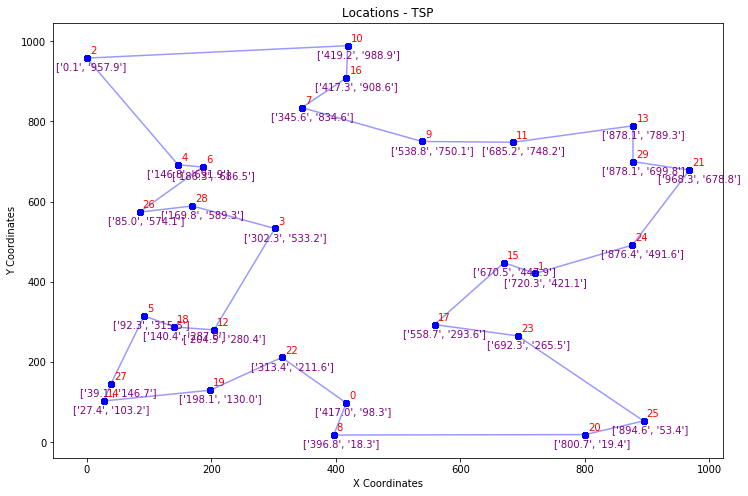

In [134]:
plotMapFinal(x_coordinate,y_coordinate,x,paths)